Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import joblib

In [2]:
df = pd.read_csv('CarPrice.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# Handiling Outliers

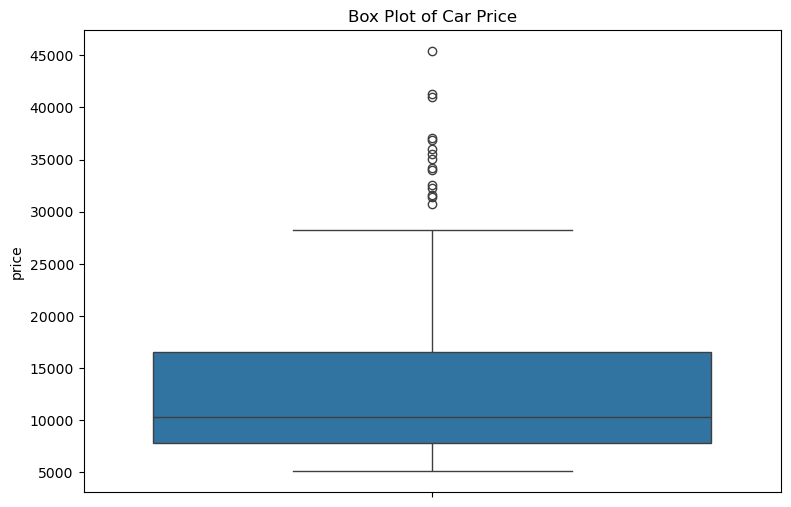

In [9]:
plt.figure(figsize = (9,6))
sns.boxplot(y = df['price'])
plt.title('Box Plot of Car Price')
plt.show()

In [10]:
# IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [12]:
# Encoding

In [13]:
# One Hot Encoder

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# One-hot encode the specified categorical columns  
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  

# Display the updated DataFrame  
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,True,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


In [14]:
# Feature Selection

In [15]:
# Define independent variables (X) and target variable (y)

X = df.drop('price', axis=1)  # Replace 'price' with the target column
y = df['price']

selector = SelectKBest(score_func=f_regression, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()].tolist()
print(f"Selected Features:")
selected_features

Selected Features:


['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg',
 'drivewheel_fwd',
 'drivewheel_rwd']

In [16]:
X = pd.DataFrame(X_new, columns=selected_features)

In [17]:
# Feature Scaling

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state =42)

Model Implementation

In [21]:
models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'Support Vector Regressor' : SVR()
}

In [22]:
# Train models
model_results= {}
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    model_results[name] = {
    'R2 Score' : r2_score(y_test, y_pred),
    'MSE' : mean_squared_error(y_test, y_pred),
    'MAE' : mean_absolute_error(y_test, y_pred)
    }

3. Model Evaluation

In [23]:
# Display results
for name,metrics in model_results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}:{value}")


Linear Regression:
R2 Score:0.7709211015665792
MSE:3850709.888234675
MAE:1504.9777394661992

Decision Tree Regressor:
R2 Score:0.8624798718157018
MSE:2311649.484312868
MAE:1006.8771842105263

Random Forest Regressor:
R2 Score:0.8996268837763095
MSE:1687225.4659799107
MAE:914.9118333333332

Gradient Boosting Regressor:
R2 Score:0.9014981890507203
MSE:1655769.6934344817
MAE:942.8747080353639

Support Vector Regressor:
R2 Score:-0.015294213897370401
MSE:17066624.18781596
MAE:3651.5907571328808


In [24]:
# Compare and Find Best Model

In [25]:
# Identify the best model based on R2 Score
best_model = max(model_results, key=lambda x: model_results[x]['R2 Score'])
print(f"Best Model: {best_model}")

Best Model: Gradient Boosting Regressor


The Gradient Boosting Regressor is the best-performing model because it has the highest R² Score and the lowest MSE. This combination makes it the most reliable model for predicting car prices in this dataset. While Random Forest also performs well, the slightly better metrics of Gradient Boosting give it the edge.

Hyperparameter Tuning

In [26]:
param_grid_gb = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid_gb, cv=3, scoring='r2')
grid_search_gb.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_gb.best_params_}")
best_gb_model = grid_search_gb.best_estimator_

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1.0}


In [27]:
# Evaluate the tuned model
y_pred_tuned = best_gb_model.predict(X_test)
r2_tuned = r2_score(y_test,y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print(f"Tuned Model - R2: {r2_tuned}, MSE: {mse_tuned}, MAE: {mae_tuned}")

Tuned Model - R2: 0.8972708420198605, MSE: 1726829.4336552175, MAE: 987.8512227478572


In [28]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)

# Save the default Gradient Boosting Regressor as the final model
joblib.dump(best_model, 'best_model_default_gb.pkl')
print("Default Gradient Boosting Regressor saved as 'best_model_default_gb.pkl'")

Default Gradient Boosting Regressor saved as 'best_model_default_gb.pkl'


In [29]:
# Load the saved model
loaded_model = joblib.load('best_model.pkl')

# Test with new data (select the first 5 rows as unseen data)
unseen_data = X_test[:5]

# Get actual values for the unseen data
actual_values = y_test[:5]

# Make predictions on unseen data
predictions = loaded_model.predict(unseen_data)

# Compare predictions with actual values
comparison = pd.DataFrame({
    'Actual': actual_values,
    'Predicted': predictions
})

print("Comparison of Predictions and Actual Values:")
print(comparison)


Comparison of Predictions and Actual Values:
      Actual     Predicted
190   9980.0   9083.865982
195  13415.0  16239.162194
122   7609.0   7554.339521
76    5389.0   6365.362288
112  16900.0  17423.133116
